In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# Reading the dataset
df = pd.read_csv("\loan.csv")
df.head()

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

Data Cleaning

In [2]:
# Inspecting the column-wise null values
df.isnull().sum(axis=0)

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [3]:
# Inspecting the column-wise null values percentage
print(round(100*(df.isnull().sum()/len(df.index)), 2))

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

In [4]:
# Dropping columns with high null values percentage
df = df.dropna(axis=1, thresh=int(0.5*len(df)))

In [5]:
# Inspecting the column-wise null values percentage after dropping columns with null values
print(round(100*(df.isnull().sum()/len(df.index)), 2))

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Regular expressions for string manipulation
import re

# Ignore warnings due to version problems
import warnings
warnings.filterwarnings('ignore')

#Finding number of unique values in each vcolumn
df.nunique().sort_values().head(20)

tax_liens                      1
delinq_amnt                    1
chargeoff_within_12_mths       1
acc_now_delinq                 1
application_type               1
policy_code                    1
initial_list_status            1
collections_12_mths_ex_med     1
pymnt_plan                     1
term                           2
pub_rec_bankruptcies           3
verification_status            3
loan_status                    3
pub_rec                        5
home_ownership                 5
grade                          7
inq_last_6mths                 9
emp_length                    11
delinq_2yrs                   11
purpose                       14
dtype: int64

In [7]:
# Dropping Columns with only one values.
df.drop(['tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq',
           'application_type','policy_code','collections_12_mths_ex_med', 'initial_list_status', 'pymnt_plan'], axis=1, inplace=True)

In [8]:
# Finding number of unique values
df.nunique().sort_values(ascending=False)

id                         39717
url                        39717
member_id                  39717
total_pymnt                37850
total_pymnt_inv            37518
total_rec_int              35148
last_pymnt_amnt            34930
emp_title                  28820
desc                       26527
revol_bal                  21711
title                      19615
installment                15383
funded_amnt_inv             8205
total_rec_prncp             7976
annual_inc                  5318
recoveries                  4040
dti                         2868
collection_recovery_fee     2616
total_rec_late_fee          1356
out_prncp_inv               1138
out_prncp                   1137
revol_util                  1089
funded_amnt                 1041
loan_amnt                    885
zip_code                     823
earliest_cr_line             526
int_rate                     371
last_credit_pull_d           106
last_pymnt_d                 101
total_acc                     82
issue_d   

In [9]:
# Removing the desc column as an equivalent short and 
# consise information is present in the purpose and title column of the data.
df = df.drop('desc',axis=1)

In [10]:
# Finding number of unique values in ascending order to find if there are any categorical values
df.nunique().sort_values(ascending=True)

term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
pub_rec                        5
home_ownership                 5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
sub_grade                     35
open_acc                      40
addr_state                    50
issue_d                       55
total_acc                     82
last_pymnt_d                 101
last_credit_pull_d           106
int_rate                     371
earliest_cr_line             526
zip_code                     823
loan_amnt                    885
funded_amnt                 1041
revol_util                  1089
out_prncp                   1137
out_prncp_inv               1138
total_rec_late_fee          1356
collection_recovery_fee     2616
dti                         2868
recoveries                  4040
annual_inc

In [11]:
# Look at the pub_rec_bankruptcies categorical column.
# It tells us about the past number of public record bankruptcies of that borrower.
df.pub_rec_bankruptcies.value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [12]:
# Removing the rows where the value of pub_rec_bankruptcies is null to prevent bias in data
df=df[~df.pub_rec_bankruptcies.isnull()]

In [13]:
# Finding other columns with missing values
missing = round(100*(df.isnull().sum()/len(df.id)), 2) 
missing[missing != 0]

emp_title       6.19
emp_length      2.75
title           0.03
revol_util      0.13
last_pymnt_d    0.18
dtype: float64

In [14]:
# The columns emp_title, emp_length have 6.19% and 2.71% missing value.
# These columns have information about the customer/borrower like their job title and their employment length in years.
# Let's remove the rows with Nan values for these varaibles as these are important for the analysis
df=df[~df.emp_title.isnull()]
df=df[~df.emp_length.isnull()]

#The rows with empty values for title, revol_util, last_pymnt_d can also be removed
df=df[~df.title.isnull()]
df=df[~df.revol_util.isnull()]
df=df[~df.last_pymnt_d.isnull()]

In [15]:
# Columns like 'zip_code', 'id', 'funded_amnt', 'funded_amnt_inv' are not needed for the analysis as - 
# id, member_id and url : are a random values given for identification, does not contribute to analysis
# zip_code : first 3 digits of the 5 digit zip code are visible, also is redundant with addr_state, does not contribute to analysis
# funded_amnt : value for this column is almost equivalent to loan_amnt. removing to avoid multi colinearity.
# funded_amnt_inv : value for this column is almost equivalent to funded_amnt. removing to avoid multi colinearity. Also this wont be available at the time of decision making of funding a loan.
c = ['id', 'member_id', 'url', 'funded_amnt','funded_amnt_inv','zip_code']
df= df.drop(c,axis=1)

In [16]:
df.shape

(36433, 38)

In [17]:
# From the excel sheet, we can observe that some columns like total_pymnt, total_rec_late_fee and collection_recovery_fee
# require rounding up until two decimal places

df.total_pymnt= round(df.total_pymnt,2)
df.total_rec_late_fee= round(df.total_rec_late_fee,2)
df.collection_recovery_fee= round(df.collection_recovery_fee,2)

In [18]:
# Converting the dtype of issue_d, earliest_cr_line, last_pymnt_d, last_credit_pull_d to Datetime

df.issue_d = pd.to_datetime(df.issue_d, format='%b-%y')
df.earliest_cr_line = pd.to_datetime(df.earliest_cr_line, format='%b-%y')
df.last_pymnt_d = pd.to_datetime(df.last_pymnt_d, format='%b-%y')
df.last_credit_pull_d = pd.to_datetime(df.last_credit_pull_d, format='%b-%y')

In [19]:
# Dropping Duplicated rows if any
df=df.drop_duplicates()

In [20]:
# Converting columns with % values to float type and removing the % symbol

df['int_rate'] = df['int_rate'].str.strip('%').astype('float')
df['revol_util'] = df['revol_util'].str.strip('%').astype('float')

In [21]:
# Looking at the emp_length column.
df.emp_length.value_counts()

10+ years    8407
2 years      4178
< 1 year     4052
3 years      3914
4 years      3297
5 years      3129
1 year       3026
6 years      2121
7 years      1697
8 years      1405
9 years      1207
Name: emp_length, dtype: int64

In [22]:
# Converting the column to have values between 0 and 10.
emp_length_dict = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}

df = df.replace({"emp_length": emp_length_dict })
df.emp_length.value_counts()

10    8407
2     4178
0     4052
3     3914
4     3297
5     3129
1     3026
6     2121
7     1697
8     1405
9     1207
Name: emp_length, dtype: int64

In [23]:
# Column : term
df.term.value_counts()

 36 months    26377
 60 months    10056
Name: term, dtype: int64

In [24]:
# Removing the 'months' from the column
df['term'] = df.term.apply(lambda x: x.split()[0])

Analysis

In [25]:
# Writing to new csv
df.to_csv('master_loan.csv', encoding='utf-8', index=False)
master_loan = df[:]

In [26]:
master_loan.shape

(36433, 38)

In [27]:
master_loan.loan_status.value_counts()


Fully Paid     30424
Charged Off     4943
Current         1066
Name: loan_status, dtype: int64

In [28]:
#Since we are looking at historical data to analyse, remove rows with "Current" value in loan status

master_loan = master_loan[master_loan['loan_status'].isin(['Fully Paid','Charged Off'])]

In [29]:
# Changing the loan_status to a numeric variable, assign 1 for defaulted loans and 0 for paid off ones
master_loan['loan_status_num'] = master_loan['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)

In [30]:
# Removing columns that were created after the approval of loan as these cannot be used for analysis
del_cols = ["out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int",
            "total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt",
            "last_credit_pull_d"]
master_loan.drop(columns=del_cols, inplace=True)

In [31]:
master_loan.shape

(35367, 27)

In [32]:
# Dropping title column too as it is not a numeric value and has too many unique values hence
# it is not useful for the analysis 
master_loan.drop(columns=['title'], inplace=True)

In [33]:
# Percentage of loans paid vs charged off
loan_status_percent = master_loan['loan_status'].value_counts(normalize=True)
loan_status_percent*100

Fully Paid     86.023694
Charged Off    13.976306
Name: loan_status, dtype: float64

Univariate Analysis

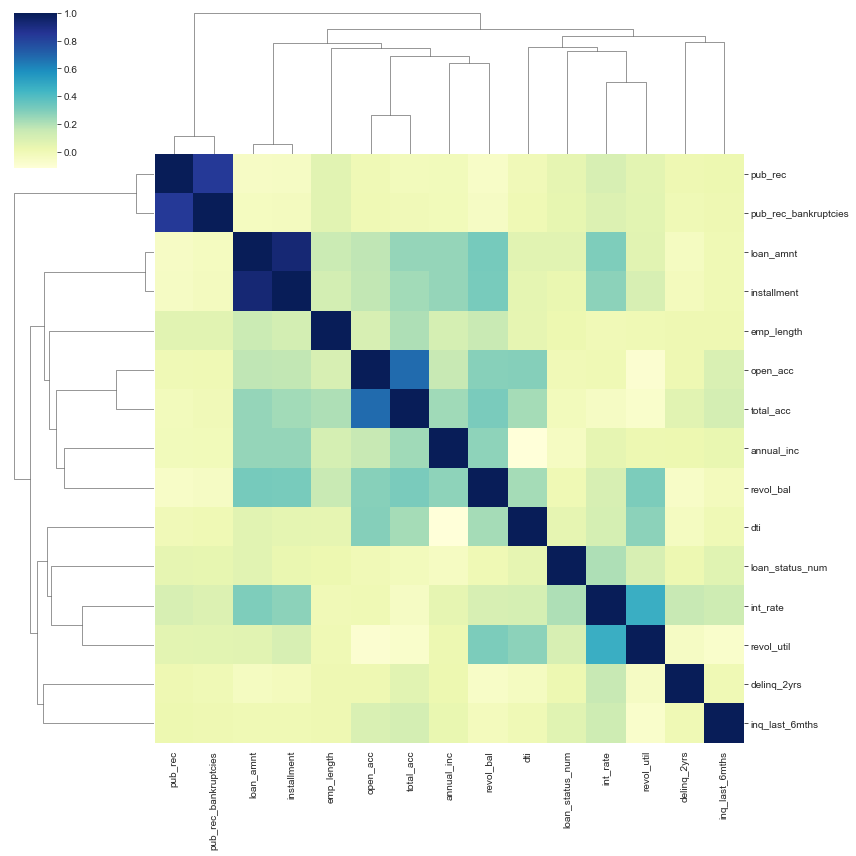

In [34]:
# Understanding the correlation between the different numeric fields
sns.set_style("whitegrid")
sns.clustermap(data=master_loan.corr(), cmap='YlGnBu', figsize=(12,12))
plt.show()

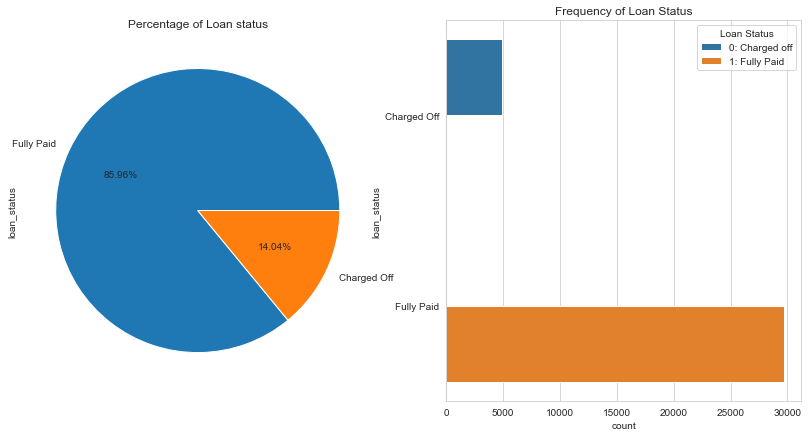

In [108]:
#Analysing the target variable
fig,num  = plt.subplots(1,2,figsize=(14,7))

master_loan.loan_status.value_counts().plot(kind='pie', ax=num[0],autopct='%1.2f%%')
num[0].set_title("Percentage of Loan status")

sns.countplot(y='loan_status',hue='loan_status',data=master_loan,ax=num[1])
num[1].legend(labels=["0: Charged off","1: Fully Paid"], title="Loan Status",loc="upper right")
num[1].set_title("Frequency of Loan Status")
plt.savefig("plot1_loan_status.jpg")
plt.show()

In [35]:
# Loan status vs Numerical continuous variables

# Setting values to be used
by = 'loan_status'
order = ['Fully Paid','Charged Off']

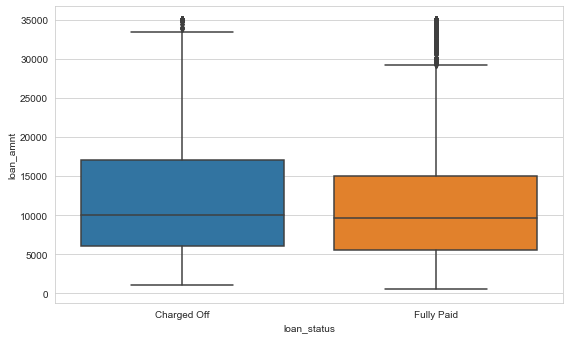

In [36]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = master_loan)
plt.show()

In [37]:
master_loan['loan_amnt'].describe()

count    35367.000000
mean     11133.071790
std       7326.233093
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [38]:
# Since we see there is huge difference between mean and median . let us limit our data to 75%
loan_till75 = master_loan.loc[(master_loan['loan_amnt']<=15000)]

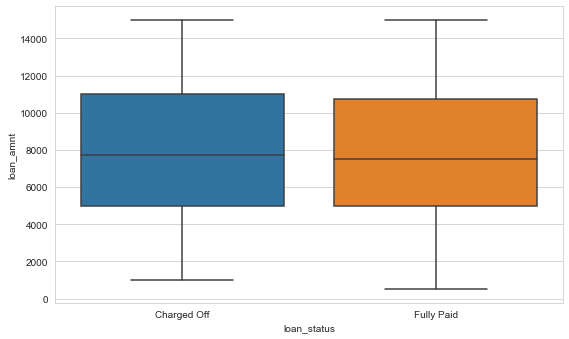

In [39]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = loan_till75)
plt.show()

From the above box plot, we can come to a conclusion that higher the loan amount, the more it will tend to be charged off

In [40]:
master_loan.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,loan_status_num
1,2500,60,15.27,59.83,C,C4,Ryder,0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0,1999-04-01,5,3,0,1687,9.4,4,0.0,1
3,10000,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0,1996-02-01,1,10,0,5598,21.0,37,0.0,0
5,5000,36,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,0,2004-11-01,3,9,0,7963,28.3,12,0.0,0
6,7000,60,15.96,170.08,C,C5,Southern Star Photography,8,RENT,47004.0,Not Verified,2011-12-01,Fully Paid,debt_consolidation,NC,23.51,0,2005-07-01,1,7,0,17726,85.6,11,0.0,0
7,3000,36,18.64,109.43,E,E1,MKC Accounting,9,RENT,48000.0,Source Verified,2011-12-01,Fully Paid,car,CA,5.35,0,2007-01-01,2,4,0,8221,87.5,4,0.0,0


In [41]:
# Function to use for plotting
def categoricalBarPlots(df, arr):
    rows = int(len(arr)/2)
    for idx, val in enumerate(arr, start=1):
        plt.subplot(rows, 2, idx)
        df.groupby(val).loan_amnt.count().plot.bar(color=sns.color_palette('husl', 16))

    plt.tight_layout()

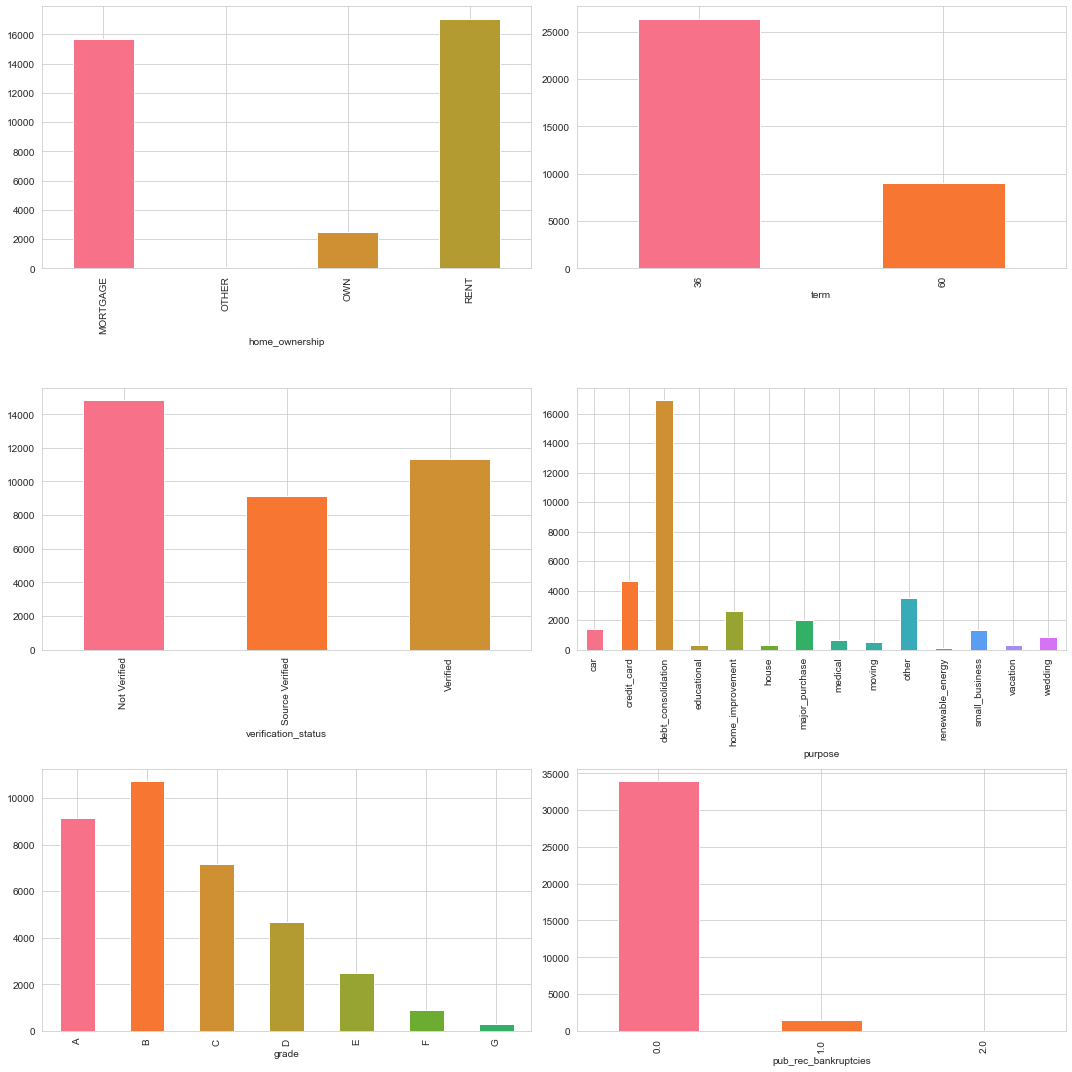

In [42]:
# Categorical Analysis
plt.figure(figsize=(15,15))

categoricalBarPlots(master_loan, ['home_ownership', 'term', 'verification_status', 'purpose', 'grade', 'pub_rec_bankruptcies'])
plt.savefig('LC_p1.jpg')

Obervations -

Most loans are for 36 month term
Most of the approved loans are for high grade
The number of loans extended to people with prior record of bankruptcy is very less
The largest 'purpose' for seeking a loan is debt_consolidation

In [43]:
# This function plots a given column against loan_status (default = 'Charged Off')
# The plots are in percentages 

def plotLoanStatus(dataframe, by, loanstatus='Charged Off'):
    grp = dataframe.groupby(['loan_status',by])[by].count()
    cnt = dataframe.groupby(by)[by].count()
    #print(grp)
    percentages = grp.unstack() * 100 / cnt.T
    #print(percentages)
    ax = percentages.loc[loanstatus].plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% of loans ' + loanstatus)
    plt.show()
    

# This method plots a distribution of target column, and its boxplot against loan_status column
def plot_distribution(dataframe, col):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    sns.distplot(dataframe[col])
    plt.subplot(1, 2, 2)
    sns.boxplot(x=dataframe[col], y=dataframe['loan_status'], data=dataframe)
    plt.show()
    
    

# This method prints two plots side by side 
# Left one is percentage of a categorical variable in the entire dataset 
# Right one is percentage for Charged Off loans 
# Significant changes in percentage from left to right can indicate a value of interest
def plot_percentages(dataframe, by, sortbyindex=False):
    plt.subplot(1, 2, 1)
    values = (master_loan[by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% in dataset', fontsize=16)
    ax.set_xlabel(by, fontsize=12)
    
    plt.subplot(1, 2, 2)
    #master_loan.groupby('loan_status')['term'].value_counts(normalize=True).loc[:'Charged Off'].plot.bar(color=sns.color_palette('husl', 16))
    values = (master_loan.loc[master_loan['loan_status']=='Charged Off'][by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% in Charged Off loans', fontsize=16)
    

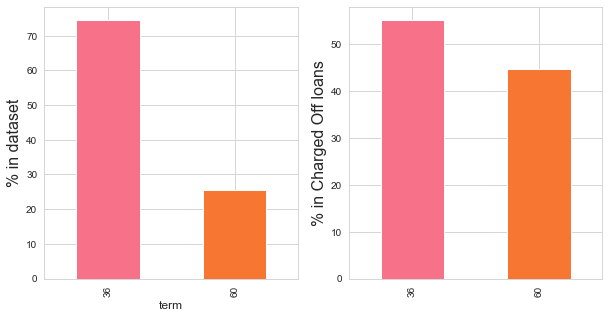

In [44]:
# term : The number of payments on the loan. Values are in months and can be either 36 or 60.
plt.figure(figsize=(10,5))
plot_percentages(master_loan, 'term')

Observation:

Around 75% of the total loans are given for duration of 3 years and just 25% of the loans are those given for 5 years.
Among Charged Off loans, percentage of term 60 months rises to 45%.

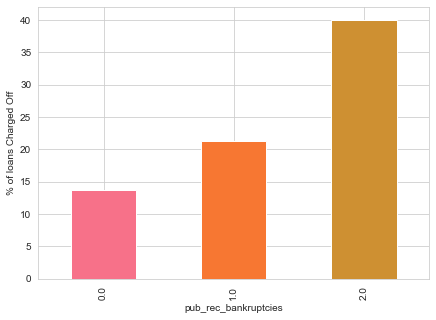

In [45]:
# pub_rec_bankruptcy: Number of public record bankruptcies

plt.figure(figsize=(7,5))
plotLoanStatus(master_loan, 'pub_rec_bankruptcies')

Observation

The chances of deafault are higher if the the borrower has previous record of bankruptcies

In [97]:
grouped = master_loan.groupby(["grade"])
order = grouped.median()["int_rate"].sort_values().index

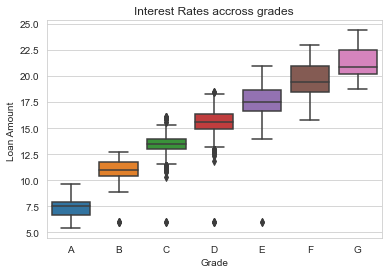

In [98]:
sns.boxplot(data=master_loan, x='grade', y='int_rate', order=order)
plt.xlabel("Grade")
plt.ylabel("Loan Amount ")
plt.title("Interest Rates accross grades")
plt.savefig('plot10_LC.jpg')
plt.show()
# As the grade increases, Interest rate increases.
## This implies that grades are awarded according to the dependancy of the borrowers.
### The riskier the loan seems, the higher the interest rate. 

<Figure size 1080x360 with 0 Axes>

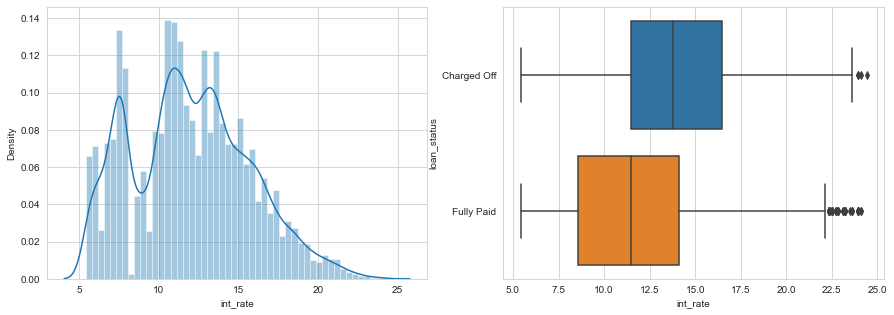

<Figure size 432x288 with 0 Axes>

In [46]:
# int_rate: Interest Rate on the loan.
plt.figure(figsize=(15,5))
plot_distribution(master_loan, 'int_rate')
plt.savefig('LC_p3.jpg')
plt.show()


Observation:
    
The intrest rate for Charged Off loans appear to be higher than for Fully paid

<Figure size 1080x360 with 0 Axes>

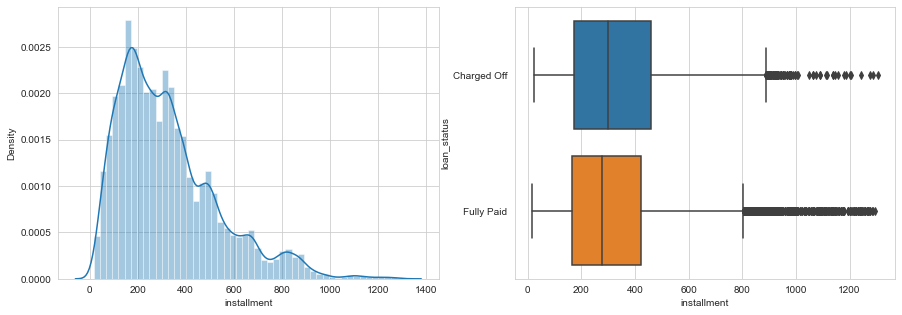

In [47]:
# installment: The monthly payment owed by the borrower if the loan originates.

plt.figure(figsize=(15,5))
plot_distribution(master_loan, 'installment')

Observation:
    
Loans Charged Off have a slightly higher installment on an average

In [48]:
# grade and sub_grade: LC assigned loan grade and subgrade.
master_loan.sub_grade.value_counts(normalize=True).head()

A4    0.075268
B3    0.073204
A5    0.070320
B5    0.069104
B4    0.063534
Name: sub_grade, dtype: float64

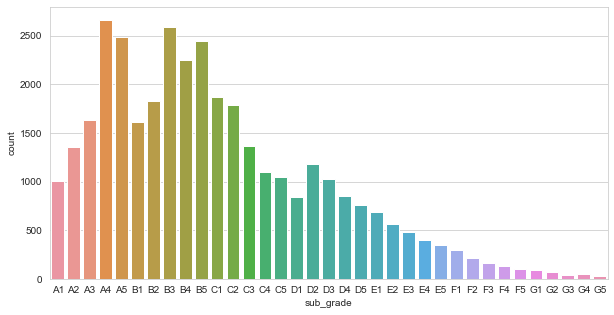

In [49]:
plt.figure(figsize=(10,5))
sns.countplot(master_loan['sub_grade'], order=sorted(master_loan.sub_grade.unique()))
plt.show()

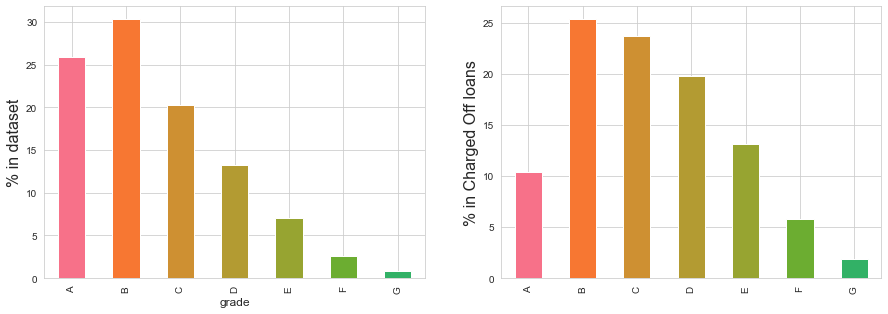

In [50]:
plt.figure(figsize=(15,5))
plot_percentages(master_loan, 'grade', True)
plt.savefig('LC_p2.jpg')

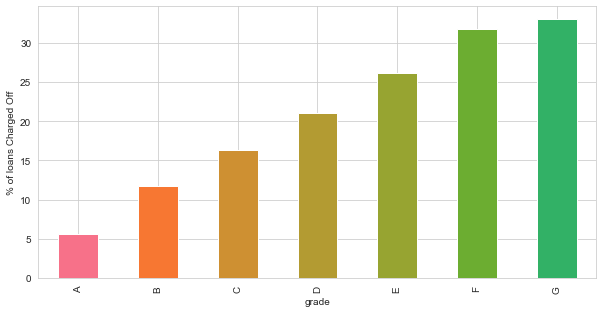

<Figure size 432x288 with 0 Axes>

In [51]:
plt.figure(figsize=(10,5))
plotLoanStatus(master_loan, 'grade')
plt.savefig('LC_P4.jpg')

Observation:

Grade A and B loans are safer comapritively. 
Grade D, E, F, G loans are less safe.
Nearly 30% of all loans in Grades F and G see a default.

In [52]:
# emp_length: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means
# ten or more years.

master_loan.emp_length.value_counts(normalize=True)

10    0.226991
2     0.115447
0     0.112478
3     0.108378
4     0.090649
5     0.086041
1     0.083666
6     0.058303
7     0.046314
8     0.038482
9     0.033251
Name: emp_length, dtype: float64

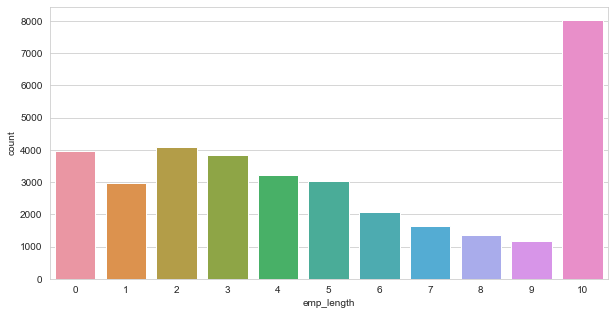

In [53]:

plt.figure(figsize=(10,5))
sns.countplot(master_loan['emp_length'], order=sorted(master_loan.emp_length.unique()))
plt.show()

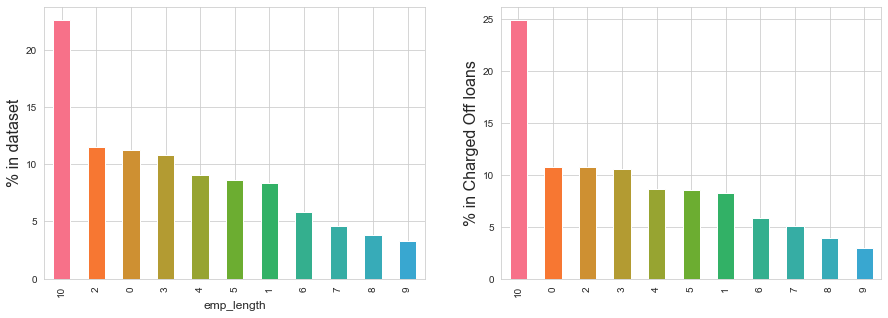

In [54]:
plt.figure(figsize=(15, 5))
plot_percentages(master_loan, 'emp_length')

Observation:

22.7% of the of loan taker have an employment length of more than 10 years.
Emplyment length doesn't really have an impact on the loan default

In [55]:
# annual_inc: The self-reported annual income provided by the borrower during registration.

master_loan.annual_inc.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])

count    3.536700e+04
mean     6.909599e+04
std      6.396705e+04
min      4.000000e+03
10%      3.000000e+04
25%      4.150000e+04
50%      6.000000e+04
75%      8.250000e+04
90%      1.150000e+05
max      6.000000e+06
Name: annual_inc, dtype: float64

<AxesSubplot:xlabel='annual_inc'>

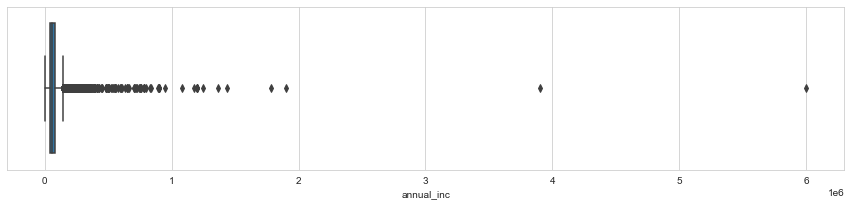

In [56]:
plt.figure(figsize=(15, 3))
sns.boxplot(x=master_loan['annual_inc'], data=master_loan)

In [57]:
# Getting rid of outliers to analyze annual income. 
# Keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
df_data = master_loan[np.abs(master_loan.annual_inc-master_loan.annual_inc.mean()) <= (3*master_loan.annual_inc.std())]

In [58]:
df.annual_inc.describe()

count    3.643300e+04
mean     6.930522e+04
std      6.354244e+04
min      4.000000e+03
25%      4.200000e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

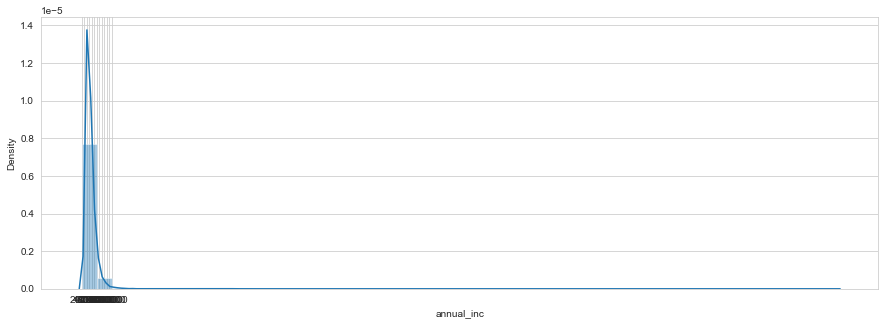

In [59]:
plt.figure(figsize=(15, 5))
sns.distplot(df['annual_inc'], hist_kws={'log':False})
plt.xticks(np.arange(0, 260000, 20000))
plt.show()

In [60]:
#Create Derived categorical variable
master_loan['income_bin'] = master_loan['annual_inc']/20000
#master_loan['income_bin'] = pd.cut(master_loan['annual_inc'], [x for x in range(0, 6010000, 10000)], labels=[str(x)+'-'+str(x+10)+'k' for x in range (0, 6000, 10)])
master_loan['income_bin'] = master_loan['income_bin'].astype(int)

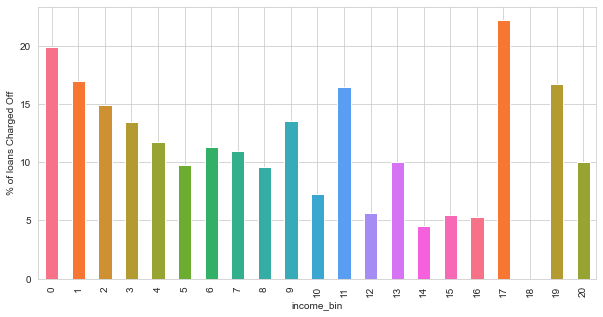

In [61]:
plt.figure(figsize=(10,5))
plotLoanStatus(master_loan.loc[master_loan['income_bin']<21], 'income_bin')

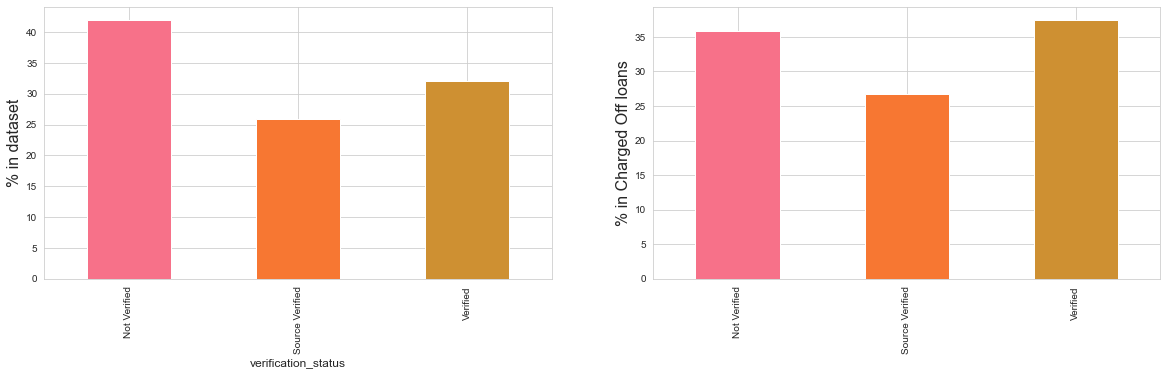

In [62]:
# verification_status: Indicates if income was verified by LC, not verified, or if the income source was verified

plt.figure(figsize=(20,5))
plot_percentages(master_loan, 'verification_status', True)

In [63]:
# dti: A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage
# and the requested LC loan, divided by the borrower’s self-reported monthly income.

master_loan.dti.describe()

count    35367.000000
mean        13.403961
std          6.636540
min          0.000000
25%          8.320000
50%         13.500000
75%         18.640000
max         29.990000
Name: dti, dtype: float64

<Figure size 720x360 with 0 Axes>

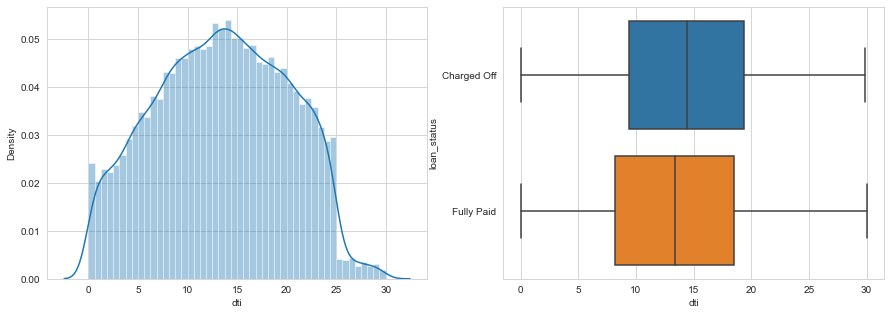

In [64]:
plt.figure(figsize=(10,5))

plot_distribution(master_loan, 'dti')

In [65]:
# Create derived variable 
master_loan['dti_bin'] = pd.cut(master_loan['dti'], [0,5,10,15,20,25,30], labels=['0-5','5-10','10-15','15-20','20-25','25-30'])

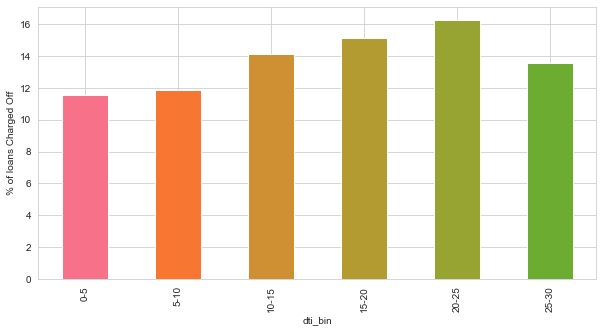

In [66]:
plt.figure(figsize=(10,5))
plotLoanStatus(master_loan, 'dti_bin')

Observation:

Higher the dti higher the chances of loan being Charged Off

In [67]:
# delinq_2yrs: The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years.
master_loan.delinq_2yrs.value_counts(normalize=True)

0     0.891594
1     0.083100
2     0.017361
3     0.005344
4     0.001499
5     0.000594
6     0.000283
7     0.000113
8     0.000057
11    0.000028
9     0.000028
Name: delinq_2yrs, dtype: float64

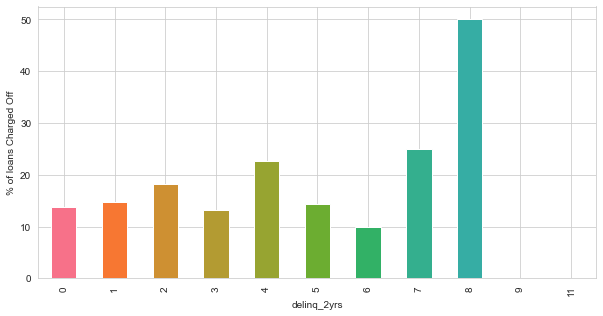

In [68]:
plt.figure(figsize=(10,5))
plotLoanStatus(master_loan, 'delinq_2yrs')

In [69]:
# inq_last_6mths: The number of inquiries in past 6 months (excluding auto and mortgage inquiries)
master_loan.inq_last_6mths.value_counts(normalize=True)

0    0.485848
1    0.276359
2    0.147256
3    0.076427
4    0.007917
5    0.003478
6    0.001527
7    0.000877
8    0.000311
Name: inq_last_6mths, dtype: float64

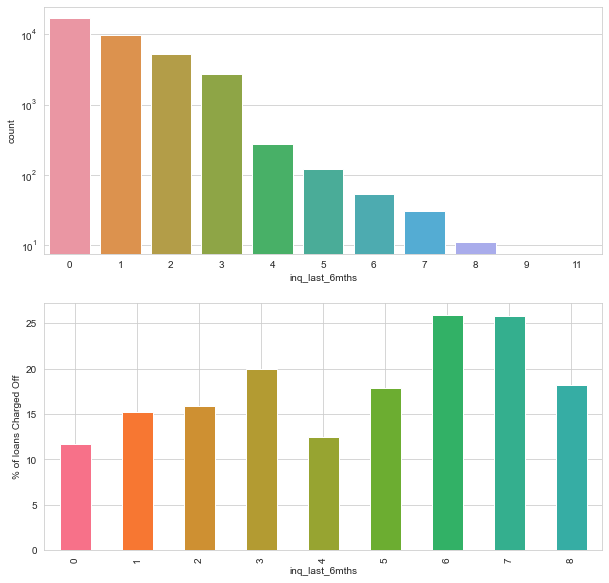

In [70]:
plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)
c=sns.countplot(master_loan['inq_last_6mths'], order=sorted(master_loan.delinq_2yrs.unique()))
c.set_yscale('log')

plt.subplot(2, 1, 2)
plotLoanStatus(master_loan, 'inq_last_6mths')
plt.show()

<Figure size 1080x360 with 0 Axes>

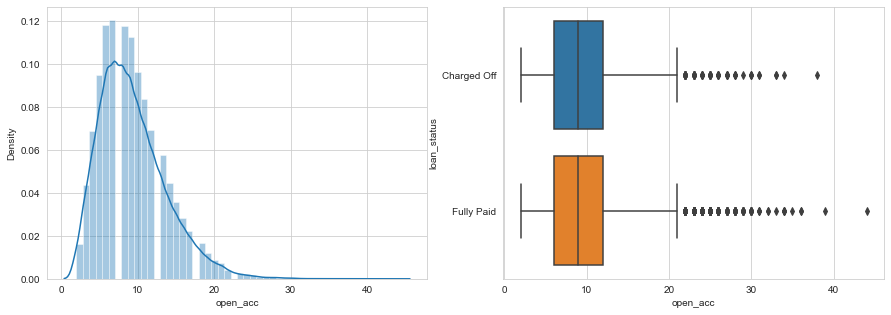

In [71]:
# open_acc: The number of open credit lines in the borrower's credit file.

plt.figure(figsize=(15,5))
plot_distribution(master_loan, 'open_acc')
plt.show()

Observation:
    
There is no significant difference in the credit lines of charged off and fully paid loans.

In [72]:
# pub_rec: Number of derogatory public records.
master_loan.pub_rec.value_counts(normalize=True)

0    0.947663
1    0.050838
2    0.001244
3    0.000198
4    0.000057
Name: pub_rec, dtype: float64

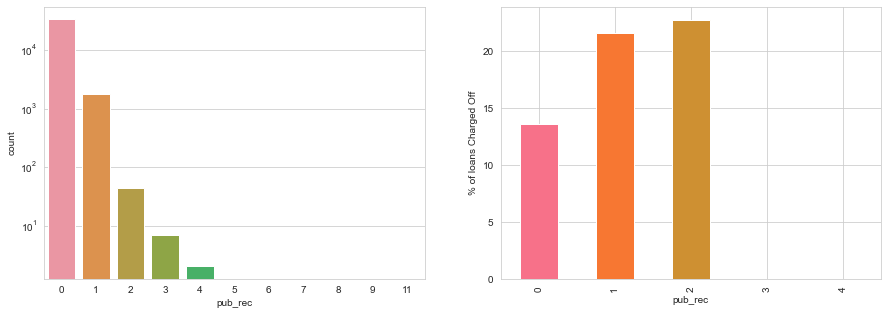

In [73]:

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
c=sns.countplot(master_loan['pub_rec'], order=sorted(master_loan.delinq_2yrs.unique()))
c.set_yscale('log')

plt.subplot(1, 2, 2)
plotLoanStatus(master_loan, 'pub_rec')
plt.show()


Observation:

94% have no Public derogatory records. 5% have 1 derogatory record.
Having even 1 derogatory record increases the chances of Charge Off significantly.

In [74]:
# revol_bal: Total credit revolving balance
master_loan.revol_bal.describe()

count     35367.000000
mean      13367.676733
std       15678.460397
min           0.000000
25%        3782.000000
50%        8934.000000
75%       17064.500000
max      149588.000000
Name: revol_bal, dtype: float64

In [75]:
# keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
master_loan = master_loan[np.abs(master_loan.revol_bal-master_loan.revol_bal.mean()) <= (3*master_loan.revol_bal.std())]

In [76]:
# The values vary a lot. Transforming to a log scale will help analyse better.
master_loan['revol_bal_log'] = master_loan['revol_bal'].apply(lambda x : np.log(x+1))

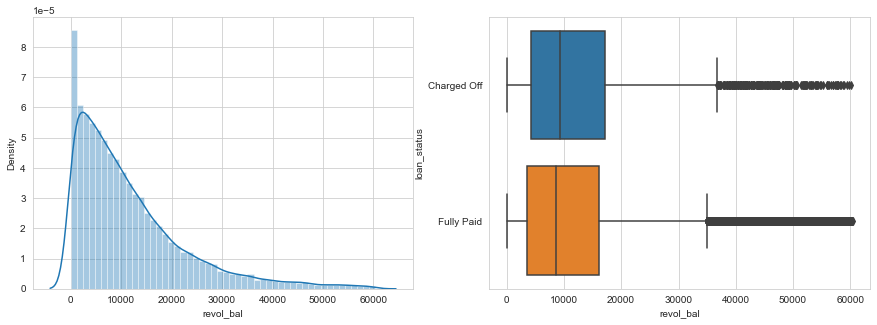

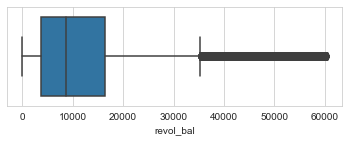

In [77]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
sns.distplot(master_loan['revol_bal'])
plt.subplot(1, 2, 2)
sns.boxplot(x=master_loan['revol_bal'], y=master_loan['loan_status'], data=master_loan)
#sns.barplot(x='loan_status', y='annual_inc_log',data= master_loan)
plt.show()
plt.subplot(2, 1, 1)
sns.boxplot(x=master_loan['revol_bal'], data=master_loan)
plt.show()

Observation:

There is no large difference in revolving balance mean for charged off an fully Paid loans

In [78]:
# revol_util:Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
master_loan.revol_util.describe()

count    34597.000000
mean        48.904609
std         28.210493
min          0.000000
25%         25.600000
50%         49.400000
75%         72.300000
max         99.900000
Name: revol_util, dtype: float64

In [79]:
master_loan['revol_util_bin'] = round(master_loan['revol_util']/5)

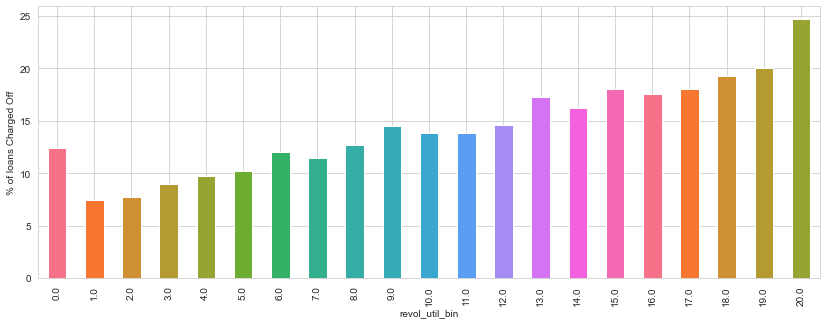

In [80]:

plt.figure(figsize=(14,5))
plotLoanStatus(master_loan, 'revol_util_bin')
plt.show()

Bivariate Analysis

In [81]:
# loan_amnt over time

# Lets split the available date into month and year column for earliest_cr_line
master_loan['issue_d_month'] = master_loan['issue_d'].dt.month
master_loan['issue_d_year'] = master_loan['issue_d'].dt.year

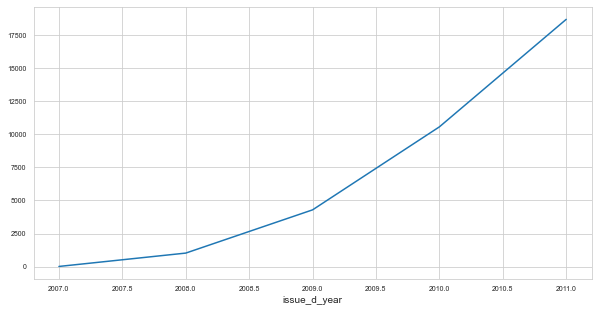

In [82]:
plt.figure(figsize=(10,5))
master_loan.groupby('issue_d_year').loan_amnt.count().plot(kind='line', fontsize=7)
plt.show()

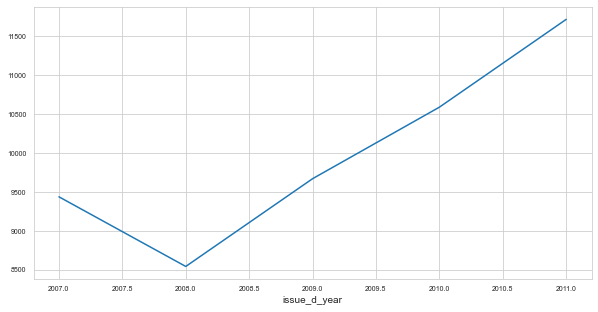

In [83]:
# Avg. loan_amnt over time
plt.figure(figsize=(10,5))
master_loan.groupby('issue_d_year').loan_amnt.mean().plot(kind='line', fontsize=7)
plt.show()

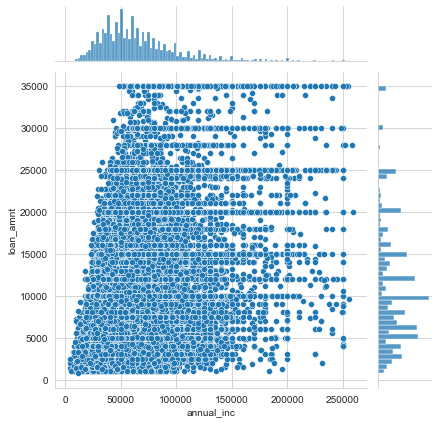

In [84]:
# loan_amnt and annual_inc
sns.jointplot('annual_inc', 'loan_amnt', master_loan.loc[master_loan['annual_inc']<260000])
plt.show()

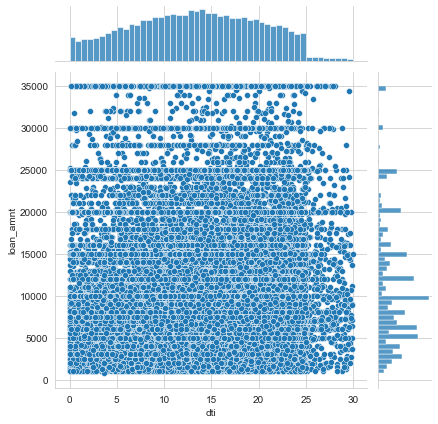

In [99]:
# Loan amount and DTI
sns.jointplot(master_loan['dti'], master_loan['loan_amnt'])
plt.show()

Observation:
Borrowers with low annual income and high DTI are provided loans of high amounts. This should be avoided to reduce the risk. 
There are people with average income lower than 50000 taking loans of 25000 or higher. These would be risky loans.

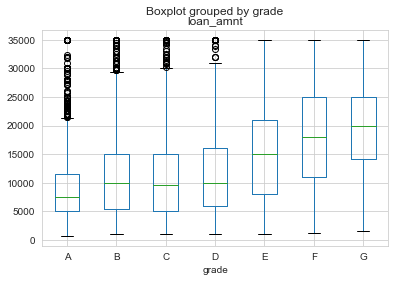

In [86]:
#loan_amnt vs grade
master_loan.boxplot(column='loan_amnt', by='grade')
plt.show()

Larger loans generally appear to be given a lower grade, with the median loan amount for a grade G loan being almost 10000 higher than that of a grade A, B, or C loan.

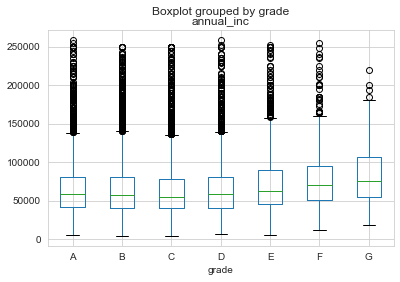

In [87]:
# annual income with grade
master_loan.loc[master_loan['annual_inc']<260000].boxplot(column='annual_inc', by='grade')
plt.show()

<AxesSubplot:xlabel='verification_status', ylabel='loan_amnt'>

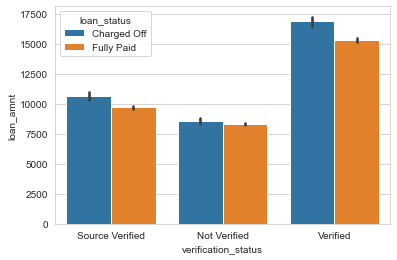

In [88]:
# loan_amnt vs verification_status vs loan status

sns.barplot(x='verification_status', y='loan_amnt', hue="loan_status", data=master_loan, estimator=np.mean)

Observation:

Higher loan amounts are Verified more often.
We already know that larger loans are less in number, but see a higher charge off rate.
It's not the verified status but it's the fact that higher loan amounts are riskier.

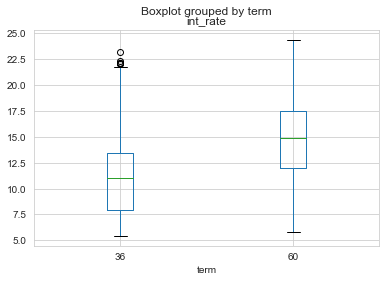

In [89]:
# Interest Rate and Term
master_loan.boxplot(column='int_rate', by='term')
plt.show()

Observation:

Intrest rates are besed on term. Larger amounts were seen to be given for higher term.

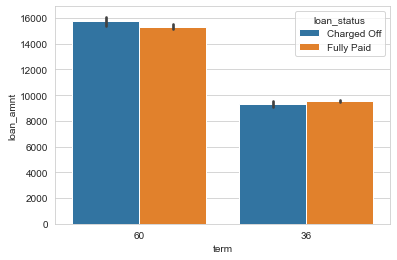

In [90]:
# Loan amount Vs term Vs Loan Status

sns.barplot(x='term', y='loan_amnt', hue="loan_status", data=master_loan, estimator=np.mean)
plt.show()

Observation:

Higher loan amount are associated with longer terms and see higher Charge Offs.

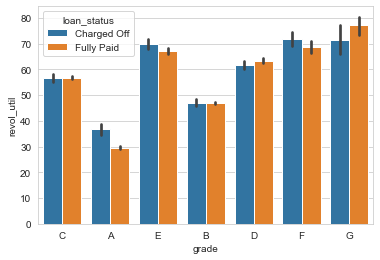

In [91]:
# revol_util Vs grade Vs Loan Status
sns.barplot(x='grade', y='revol_util', hue="loan_status", data=master_loan, estimator=np.mean)
plt.show()

In [92]:
corr=master_loan.corr()
corr['loan_amnt']

loan_amnt               1.000000
int_rate                0.295205
installment             0.931074
emp_length              0.145844
annual_inc              0.248835
dti                     0.060711
delinq_2yrs            -0.035994
inq_last_6mths          0.011510
open_acc                0.169160
pub_rec                -0.044463
revol_bal               0.365587
revol_util              0.062805
total_acc               0.252320
pub_rec_bankruptcies   -0.027806
loan_status_num         0.065344
income_bin              0.250067
revol_bal_log           0.245869
revol_util_bin          0.062462
issue_d_month           0.051272
issue_d_year            0.117322
Name: loan_amnt, dtype: float64

<AxesSubplot:>

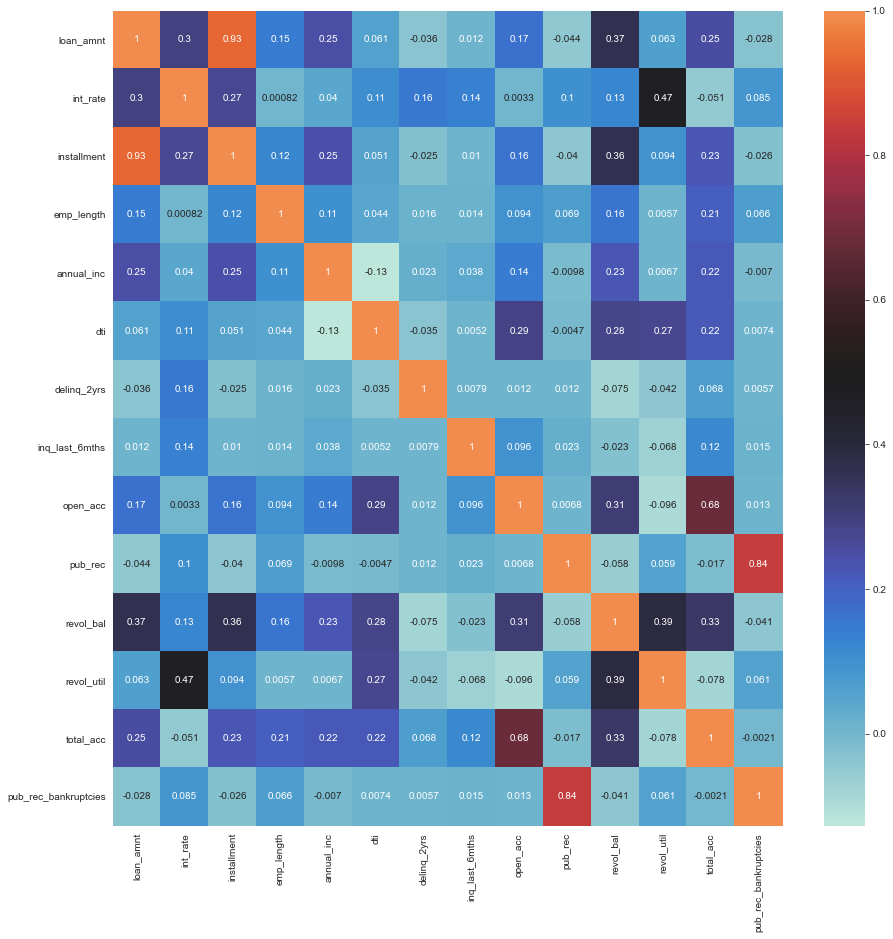

In [93]:
plt.figure(figsize=(15,15))
cont_var= ['loan_amnt', 'int_rate', 'installment',
       'emp_length', 'annual_inc',
       'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'pub_rec_bankruptcies']
corr = master_loan[cont_var].corr()
sns.heatmap(corr, annot=True, center=0.5)

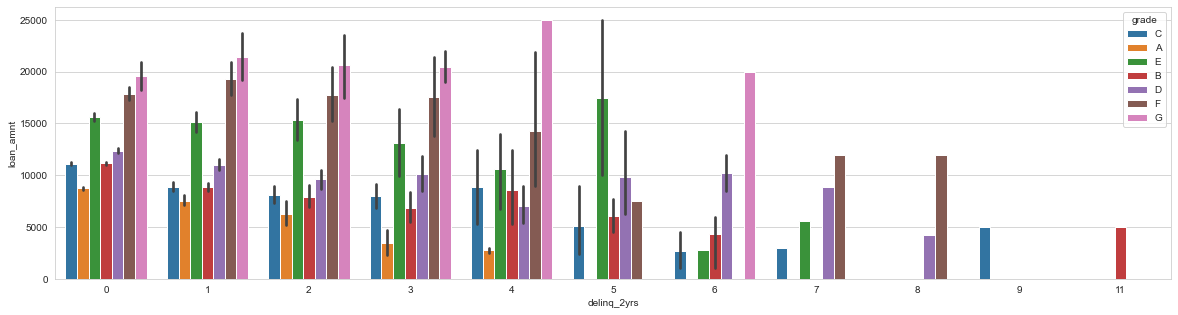

In [94]:
# delinq_2yr VS loan amount VS grade

plt.figure(figsize=(20,5))
sns.barplot(x='delinq_2yrs', y='loan_amnt', hue='grade',data=master_loan, estimator=np.mean)
plt.show()

Observation:

Not many loans receive invstment with higher number of delinquencies(>3). Despite the low loan amount request, these loans are considered risky and are not invested much in.
Lending club should further restrict their investment. We see loan amounts of >15000 on average for people having >=2 delinquencies.

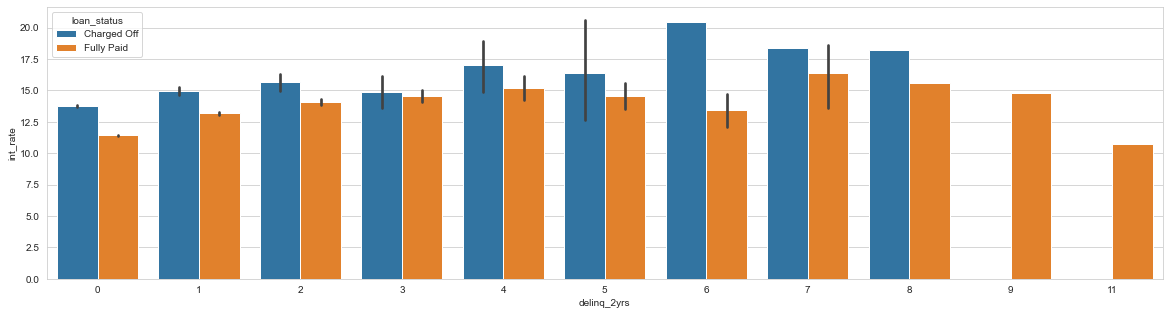

In [95]:
# delinq_2yr VS int_rate VS loan_status

plt.figure(figsize=(20,5))
sns.barplot(x='delinq_2yrs', y='int_rate', hue='loan_status',data=master_loan, estimator=np.mean)
plt.show()

Observation:

In genral, intrest rate offered inceases with the number of deliquency of the borrower.

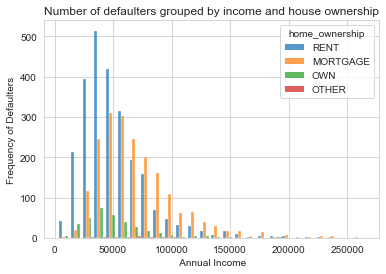

In [106]:
#plotting the number of defaulters with annual income and home ownership
df2= master_loan[(master_loan.loan_status=="Charged Off") & (master_loan['annual_inc']<260000)]
sns.histplot(data=df2, x='annual_inc' ,hue='home_ownership', binwidth=10000, multiple="dodge" )
plt.xlabel(" Annual Income")
plt.ylabel("Frequency of Defaulters")
plt.title("Number of defaulters grouped by income and house ownership")
plt.savefig('LC_p16.jpg')


Observation: 

People in lower income range and housing on rent have higher probability of defaulting.

### ***************************************** End of file *********************************************